Należy znaleźć odpowiedź na pytanie, jacy ludzie mieli większe szanse na przeżycie katastroy Titanica w opraciu o takie dane jak między innymi: wiek, płeć, klasa w jakiej podróżowali, ilość członków rodziny, która była na pokładzie, itd.

Kod był tworzony w notatniku na stronie Kaggle, pliki z danymi są dostępne w folderze Titanic.

Import bibliotek i modeli.

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

Ścieżki plików z danymi.

In [ ]:
gender_submission_path = '../input/titanic/gender_submission.csv'
test_path = '../input/titanic/test.csv'
train_path = '../input/titanic/train.csv'

gender_submission = pd.read_csv(gender_submission_path) 
#gender_submission.head()

test = pd.read_csv(test_path) 
test.head()

train = pd.read_csv(train_path) 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sprawdzenie zależności przeżywalności od płci.

Z wyników jest widoczne, że kobiety miały znacznie większe szanse na przeżycie.

Liczba kobiet w train.csv: 314
Liczba kobiet, które przeżyły: 233
% kobiet, które przeżyły: 0.7420382165605095
Liczba mężczyzn w train.csv: 577
Liczba mężczyzn, którzy przeżyli: 109
% mężczyzn, którzy przeżyli: 0.18890814558058924


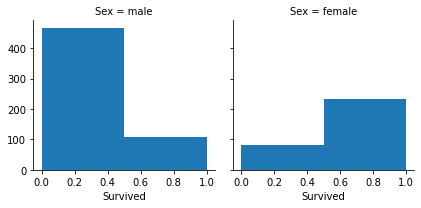

In [ ]:
women = train.loc[train.Sex == 'female']["Survived"]
women_survived = sum(women)/len(women)
print("Liczba kobiet w train.csv:", len(women))
print("Liczba kobiet, które przeżyły:", sum(women))
print("% kobiet, które przeżyły:", women_survived)


men = train.loc[train.Sex == 'male']["Survived"]
men_survived = sum(men)/len(men)
print("Liczba mężczyzn w train.csv:", len(men))
print("Liczba mężczyzn, którzy przeżyli:", sum(men))
print("% mężczyzn, którzy przeżyli:", men_survived)

g = sns.FacetGrid(train, col='Sex')
g.map(plt.hist, 'Survived', bins=2)

Wyświetlenie na wykresie zależności przeżywalności/ umieralności od wieku.

Dużą szansę na przeżycie miały małe dzieci oraz osoby pomiędzy 20 a 30 rokiem życia. 

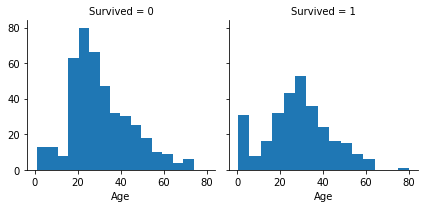

In [ ]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=15)

Sprawdzenie zależności przeżywalności od klasy w której podróżowali pasażerowie.

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Sprawdzenie zależności przeżywalności od ilości członków rodziny na pokładzie.

In [ ]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Sprawdzenie zależności przeżywalności od ilości dzieci/ rodziców na pokładzie.

In [ ]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Wybrane cechy, z które będą wykorzystywane do przewidywań, będzie to miało
wpływ na rezultat końcowy.

In [ ]:
features = ["Sex", "Pclass", "SibSp","Fare","Parch"]
#features = ["Sex", "Pclass", "SibSp"]
#features = ["Sex", "Pclass"]

In [ ]:

y = train["Survived"]
X = pd.get_dummies(train[features])

Podział danych na trenujące i walidacyjne, użycie random_state zapewnia taki sam podział za każdym razem.

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

Przekształcenie zmiennych, które są kategoriami na serię zer i jedynek (w tym przypadku płeć, stworzenie nowych kolumn odpowiadających każdej z płci, przypisanie odpowiednio zera lub jedynki)

In [ ]:
X_test = pd.get_dummies(test[features])
# Wypełnianie NaN
X = X.fillna(0)
X_test = X_test.fillna(0)
X_test.describe()

,Pclass,SibSp,Fare,Parch,Sex_female,Sex_male
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.447368,35.541956,0.392344,0.363636,0.636364
std,0.841838,0.896760,55.867684,0.981429,0.481622,0.481622
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,3.000000,1.000000,31.471875,0.000000,1.000000,1.000000
max,3.000000,8.000000,512.329200,9.000000,1.000000,1.000000


Zostanie porównane kilka algorytmów. Ten z najlepszym wynikiem zostanie wykorzystany do podania ostatecznych przewidywań. 

**k-Nearest Neighbors algorithm** (algorytm k najbliższych sąsiadów) - polega na przyporządkowaniu danej do istniejącej grupy, po znalezieniu k najbliższyc obiektów wybiera się tę grupę, która jest najliczniejsza.

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors = 3)
model_KNN.fit(train_X, train_y)
val_predictions_KNN = model_KNN.predict(X_test)
skuteczność_knn = round(model_KNN.score(val_X, val_y) * 100, 2)
skuteczność_knn

80.27

**Logistic Regression** (regresja logistyczna) - polega na obliczeniu stosunku prawdopodobieństwa sukcesu do prawdopodobieństwa porażki.

In [ ]:
model_logisticRegression = LogisticRegression() 
model_logisticRegression.fit(train_X, train_y)
val_predictions_LR = model_logisticRegression.predict(X_test)
skuteczność_logreg = round(model_logisticRegression.score(val_X, val_y) * 100, 2)
skuteczność_logreg

78.92

**Perceptron** - najprostsza sieć neuronowa, jest  w stanie określić przynależność danych wejściowych do jednej z dwóch klas.


In [ ]:
model_perceptron = Perceptron()
model_perceptron.fit(train_X, train_y)
val_prediction_P = model_perceptron.predict(X_test)
skuteczność_perceptron = round(model_perceptron.score(val_X, val_y) * 100, 2)
skuteczność_perceptron

62.33

**Support Vector Machines**

In [ ]:
model_svc = SVC()
model_svc.fit(train_X, train_y)
val_predictions_SVC = model_svc.predict(X_test)
skuteczność_svc = round(model_svc.score(val_X, val_y) * 100, 2)
skuteczność_svc

71.75

**Decision tree (drzewo decyzyjne)** - drzewo składa się z korzenia i gałęzi, które prowadzą do kolejnych wierzchołków.
Gdy z wierzchołka wychodzi co najmniej jedna krawędź - nazywany jest on węzłem, natomiast pozostałe wierzchołki to liście.

In [ ]:
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(train_X, train_y)
val_predictions_DT = model_decision_tree.predict(X_test)
skuteczność_decision_tree = round(model_decision_tree.score(val_X, val_y) * 100, 2)
skuteczność_decision_tree

82.96

**Random Forest** (Las losowy) - uogólnienie algorytmu drzew decyzyjnych, klasyfikacja odbywa się za pomocą drzew decyzyjnych, ostateczne decyzje są wynikiem głosowania większościowego nad klasami wskazanymi przez poszczególne drzewa decyzyjne.

In [ ]:
model_random_forest = RandomForestClassifier(n_estimators=100)
model_random_forest.fit(train_X, train_y)
val_predictions_RF = model_random_forest.predict(X_test)
skuteczność_random_forest = round(model_random_forest.score(val_X, val_y) * 100, 2)
skuteczność_random_forest

82.06

Porównanie wyników osiągniętych przez badane modele.

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Support Vector Machines', 
              'Perceptron', 'Random Forest','Decision Tree'],
    'Uzyskany wynik': [skuteczność_knn, skuteczność_logreg, skuteczność_svc,
              skuteczność_perceptron, skuteczność_random_forest, skuteczność_decision_tree]})
models.sort_values(by='Uzyskany wynik', ascending=False)

,Model,Uzyskany wynik
5,Decision Tree,82.96
4,Random Forest,82.06
0,KNN,80.27
1,Logistic Regression,78.92
2,Support Vector Machines,71.75
3,Perceptron,62.33


Wynik uzyskany przez Random Forest oraz Decision Tree jest zbliżony. 
Zostaje wykorzystany Decision Tree.

Poniżej lista pasażerów z informacją czy przeżyli czy nie.

In [ ]:
output = pd.DataFrame({'PassengerId': test["PassengerId"], 'Survived': val_predictions_DT})
print(output)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


Zliczenie, ile osób przeżyło, a ile nie.

In [ ]:
output.groupby(['Survived'])['Survived'].count()

Survived
0    261
1    157
Name: Survived, dtype: int64